# A304_SRO_NGO_Hall_116K_p1T_to_n1T

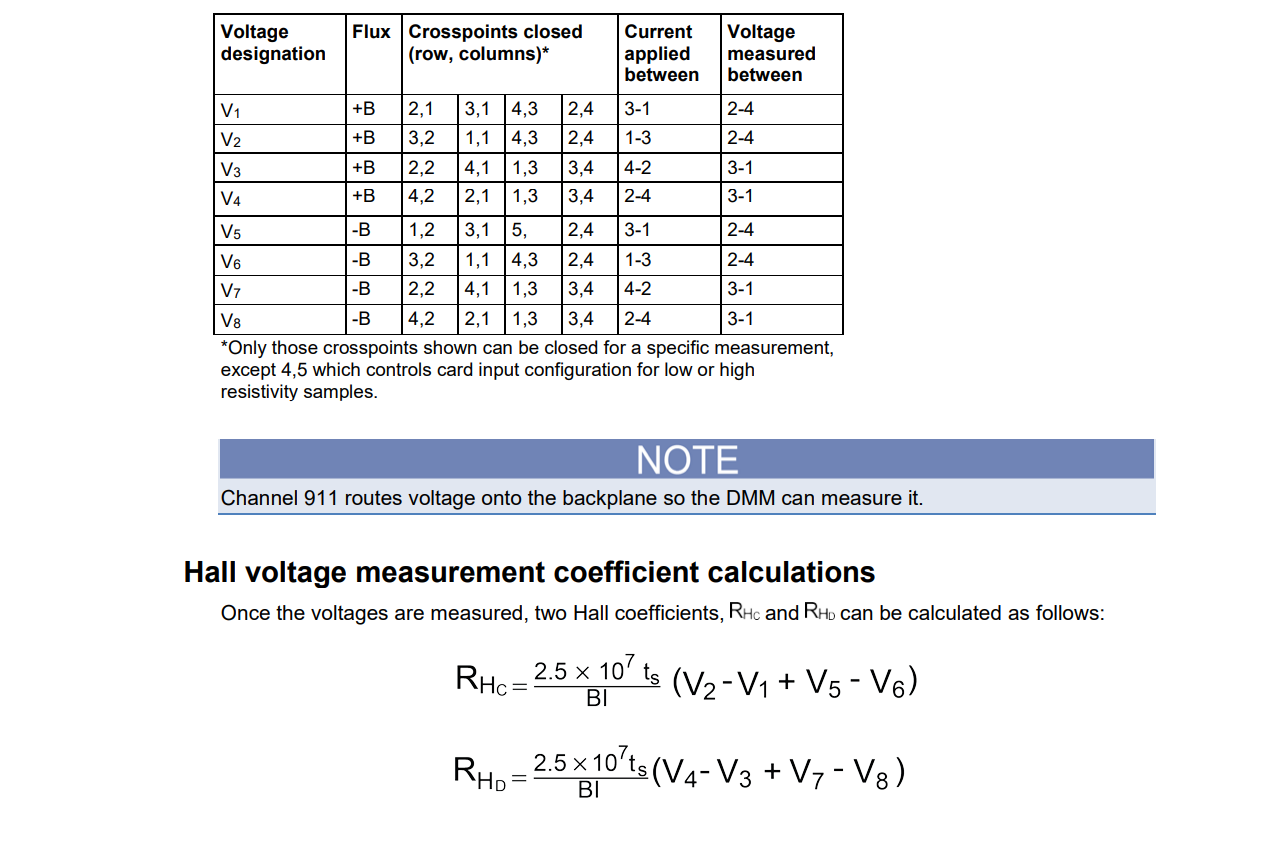

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [151]:
filename='C:\\Users\\Admin\\Desktop\\Data\\13june2023\\A304_116K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,-0.012246,116.104525,565.615302,-565.476335,-552.967914,552.878222,9.105000e-07,1000000
1,0.001,500.371208,116.003789,565.624142,-565.617225,-552.485872,552.469763,8.158000e-07,1000000
2,0.001,1000.544037,115.999771,565.526716,-565.489225,-552.197379,552.219611,7.883000e-07,1000000
3,0.001,1500.544562,115.999760,563.780578,-563.727193,-552.915527,552.958783,7.802000e-07,1000000
4,0.001,2000.487244,116.000220,558.949958,-558.827792,-555.387729,555.440578,7.742000e-07,1000000
...,...,...,...,...,...,...,...,...,...
78,0.001,6000.223193,116.000517,538.607803,-538.609197,-558.993463,559.019190,6.417000e-07,1000000
79,0.001,7000.257788,116.000297,536.676062,-536.686036,-558.174889,558.220148,6.229000e-07,1000000
80,0.001,8000.360986,116.000002,534.837591,-534.838256,-557.368439,557.408431,6.171000e-07,1000000
81,0.001,9000.257520,116.000345,533.001633,-532.999089,-556.522954,556.560306,6.429000e-07,1000000


In [152]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

### Converting B to integer B

In [153]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [174]:
df

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.385498,10000,115.999669,-531.368246,531.375688,555.807617,-555.845268,7.491000e-07,1000000
1,0.001,9000.449414,9000,116.000440,-533.176794,533.187086,556.660418,-556.695214,7.477000e-07,1000000
2,0.001,8000.511279,8000,116.000320,-535.004375,534.997209,557.479336,-557.513607,7.426000e-07,1000000
3,0.001,7000.600659,7000,116.000279,-536.808162,536.804401,558.330523,-558.359879,7.587000e-07,1000000
4,0.001,6000.340796,6000,115.999569,-538.643408,538.640711,559.190933,-559.239772,7.454000e-07,1000000
...,...,...,...,...,...,...,...,...,...,...
61,0.001,6000.223193,6000,116.000517,-538.607803,538.609197,558.993463,-559.019190,6.417000e-07,1000000
62,0.001,7000.257788,7000,116.000297,-536.676062,536.686036,558.174889,-558.220148,6.229000e-07,1000000
63,0.001,8000.360986,8000,116.000002,-534.837591,534.838256,557.368439,-557.408431,6.171000e-07,1000000
64,0.001,9000.257520,9000,116.000345,-533.001633,532.999089,556.522954,-556.560306,6.429000e-07,1000000


In [155]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

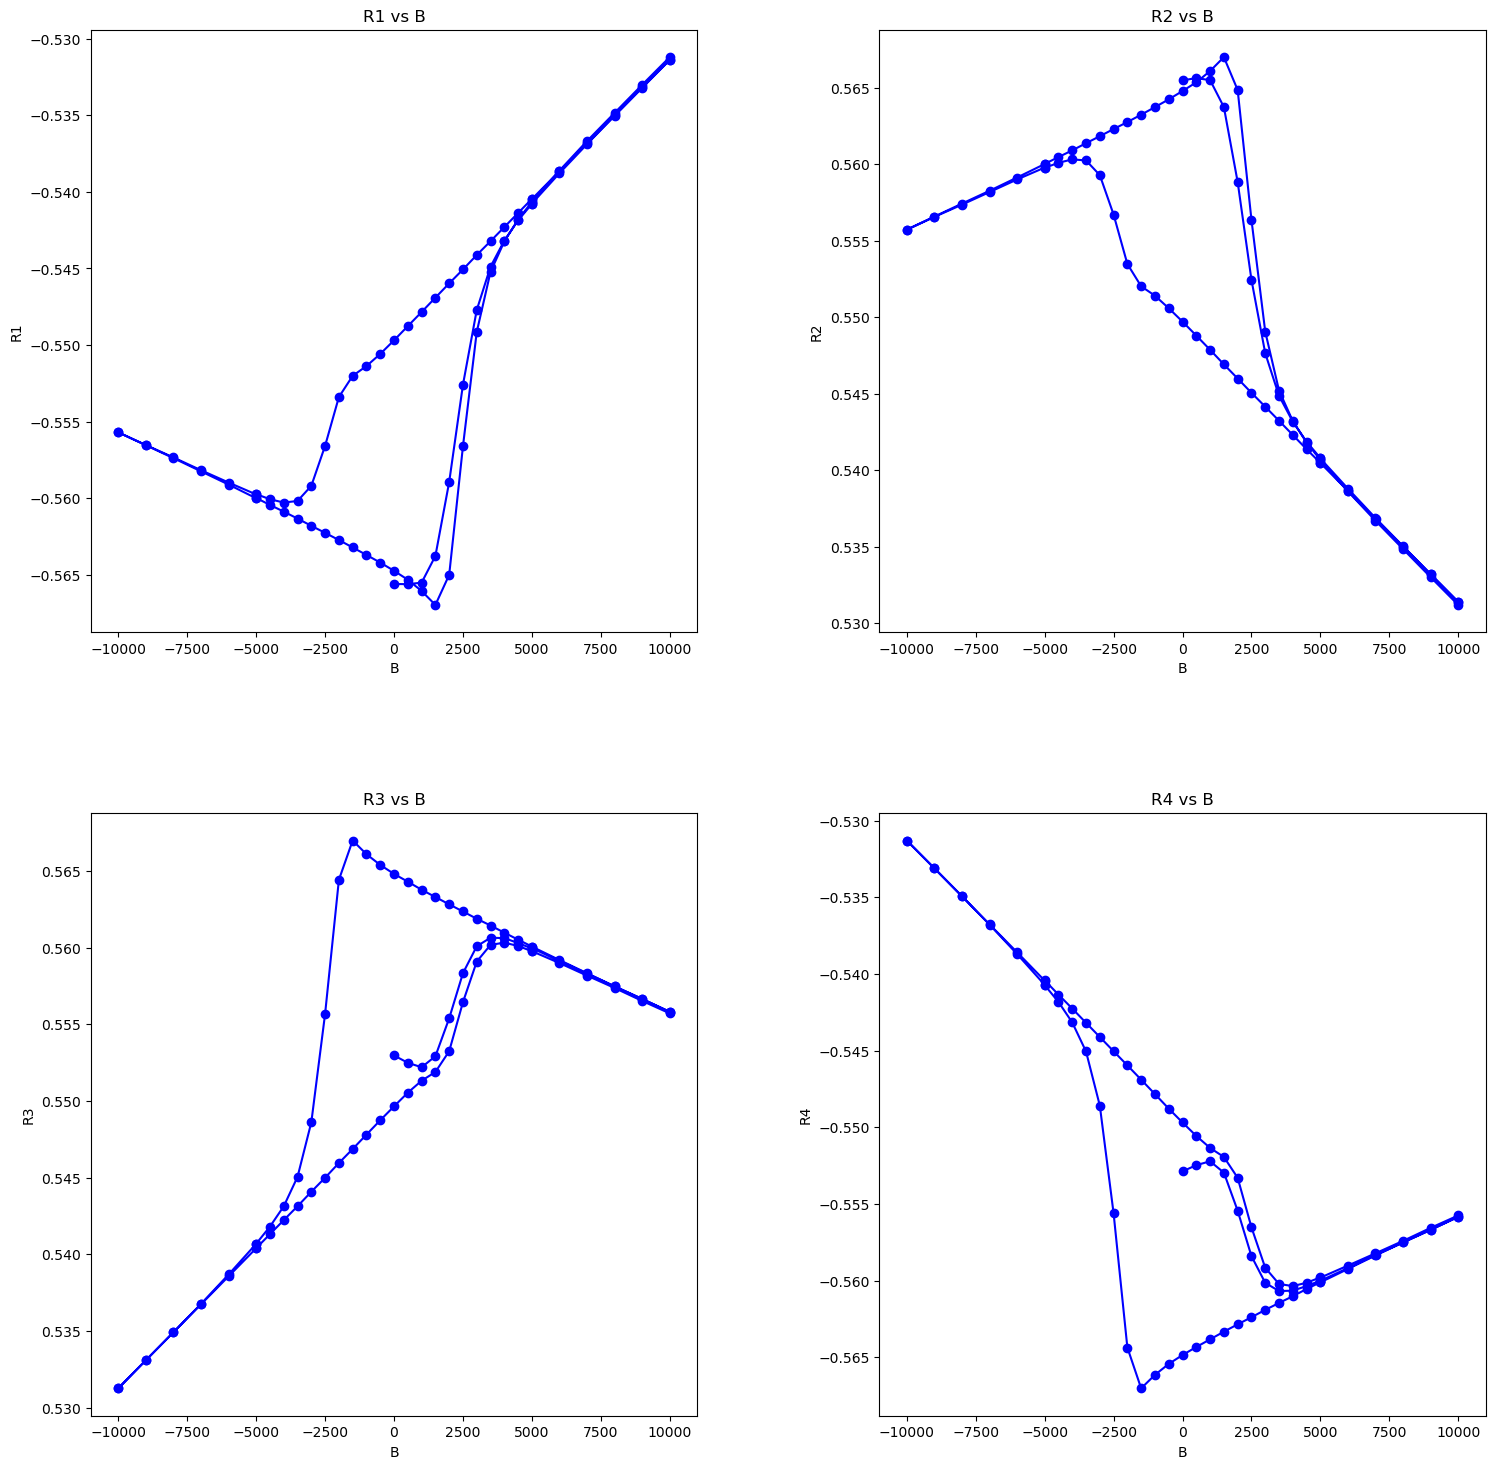

In [156]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [157]:
B_max = max(df['B_int'])
B_max_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_max:
        B_max_first_idx = i
        break
B_max_first_idx

16

In [158]:
df = df.iloc[B_max_first_idx+1:].copy()
df.reset_index(inplace = True, drop = True) # resetting index

In [175]:
df

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.385498,10000,115.999669,-531.368246,531.375688,555.807617,-555.845268,7.491000e-07,1000000
1,0.001,9000.449414,9000,116.000440,-533.176794,533.187086,556.660418,-556.695214,7.477000e-07,1000000
2,0.001,8000.511279,8000,116.000320,-535.004375,534.997209,557.479336,-557.513607,7.426000e-07,1000000
3,0.001,7000.600659,7000,116.000279,-536.808162,536.804401,558.330523,-558.359879,7.587000e-07,1000000
4,0.001,6000.340796,6000,115.999569,-538.643408,538.640711,559.190933,-559.239772,7.454000e-07,1000000
...,...,...,...,...,...,...,...,...,...,...
61,0.001,6000.223193,6000,116.000517,-538.607803,538.609197,558.993463,-559.019190,6.417000e-07,1000000
62,0.001,7000.257788,7000,116.000297,-536.676062,536.686036,558.174889,-558.220148,6.229000e-07,1000000
63,0.001,8000.360986,8000,116.000002,-534.837591,534.838256,557.368439,-557.408431,6.171000e-07,1000000
64,0.001,9000.257520,9000,116.000345,-533.001633,532.999089,556.522954,-556.560306,6.429000e-07,1000000


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [159]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [160]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [161]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [162]:
df_dec

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.385498,10000,115.999669,-531.368246,531.375688,555.807617,-555.845268,7.491000e-07,1000000
1,0.001,9000.449414,9000,116.000440,-533.176794,533.187086,556.660418,-556.695214,7.477000e-07,1000000
2,0.001,8000.511279,8000,116.000320,-535.004375,534.997209,557.479336,-557.513607,7.426000e-07,1000000
3,0.001,7000.600659,7000,116.000279,-536.808162,536.804401,558.330523,-558.359879,7.587000e-07,1000000
4,0.001,6000.340796,6000,115.999569,-538.643408,538.640711,559.190933,-559.239772,7.454000e-07,1000000
5,0.001,5000.269287,5000,116.000004,-540.470007,540.466797,560.066022,-560.115656,7.413000e-07,1000000
6,0.001,5000.279126,5000,116.000317,-540.454555,540.467219,560.070647,-560.103324,7.327000e-07,1000000
7,0.001,4500.207593,4500,116.000693,-541.378610,541.363637,560.519699,-560.545897,7.331000e-07,1000000
8,0.001,4000.231592,4000,116.000511,-542.296763,542.295128,560.974205,-561.017937,7.137000e-07,1000000
9,0.001,3500.448157,3500,116.000323,-543.218767,543.224361,561.442231,-561.457272,7.208000e-07,1000000


In [163]:
df_inc

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
33,0.001,-10000.267627,-10000,116.000462,-555.709518,555.719117,531.263739,-531.301472,6.932000e-07,1000000
34,0.001,-9000.520459,-9000,116.000117,-556.550009,556.569606,533.081308,-533.122263,6.979000e-07,1000000
35,0.001,-8000.332373,-8000,116.000612,-557.393905,557.417946,534.917583,-534.945095,6.938000e-07,1000000
36,0.001,-7000.475781,-7000,116.000292,-558.255618,558.254826,536.734419,-536.769839,6.983000e-07,1000000
37,0.001,-6000.446899,-6000,116.000229,-559.119743,559.123177,538.562515,-538.590641,6.945000e-07,1000000
38,0.001,-5000.330640,-5000,116.000352,-560.015050,560.003848,540.391207,-540.437236,6.858000e-07,1000000
39,0.001,-5000.278320,-5000,116.000308,-559.993190,560.011683,540.395852,-540.419524,6.846000e-07,1000000
40,0.001,-4500.314502,-4500,116.000339,-560.451063,560.457033,541.309152,-541.350419,6.824000e-07,1000000
41,0.001,-4000.287061,-4000,116.000095,-560.885813,560.898165,542.225499,-542.259534,6.874000e-07,1000000
42,0.001,-3500.172949,-3500,116.000330,-561.340136,561.363737,543.131423,-543.188639,6.945000e-07,1000000


In [164]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [165]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,115.999669,-531.368246,531.375688,555.807617,-555.845268,-555.709518,555.719117,531.263739,-531.301472,1000000
1,0.001,9000,116.000440,-533.176794,533.187086,556.660418,-556.695214,-556.550009,556.569606,533.081308,-533.122263,1000000
2,0.001,8000,116.000320,-535.004375,534.997209,557.479336,-557.513607,-557.393905,557.417946,534.917583,-534.945095,1000000
3,0.001,7000,116.000279,-536.808162,536.804401,558.330523,-558.359879,-558.255618,558.254826,536.734419,-536.769839,1000000
4,0.001,6000,115.999569,-538.643408,538.640711,559.190933,-559.239772,-559.119743,559.123177,538.562515,-538.590641,1000000
5,0.001,5000,116.000004,-540.470007,540.466797,560.066022,-560.115656,-560.015050,560.003848,540.391207,-540.437236,1000000
6,0.001,4500,116.000693,-541.378610,541.363637,560.519699,-560.545897,-560.451063,560.457033,541.309152,-541.350419,1000000
7,0.001,4000,116.000511,-542.296763,542.295128,560.974205,-561.017937,-560.885813,560.898165,542.225499,-542.259534,1000000
8,0.001,3500,116.000323,-543.218767,543.224361,561.442231,-561.457272,-561.340136,561.363737,543.131423,-543.188639,1000000
9,0.001,3000,116.000403,-544.122529,544.143083,561.882734,-561.908605,-561.814178,561.822432,544.075323,-544.114126,1000000


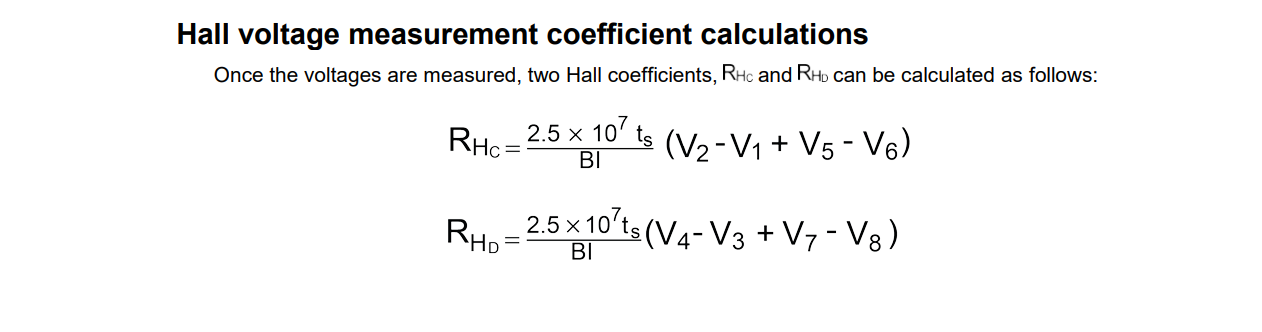
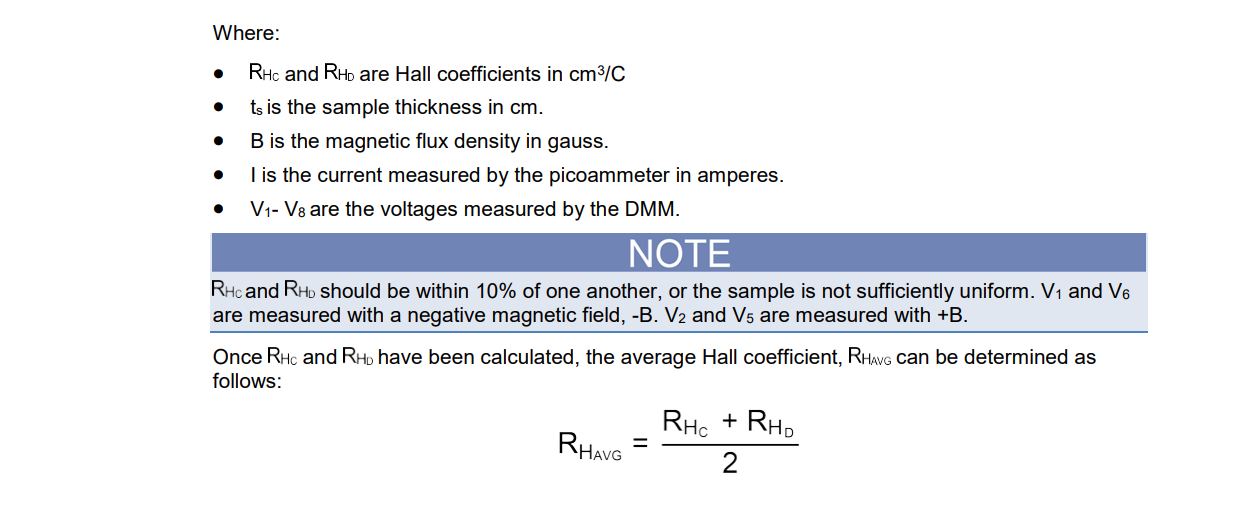

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [166]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

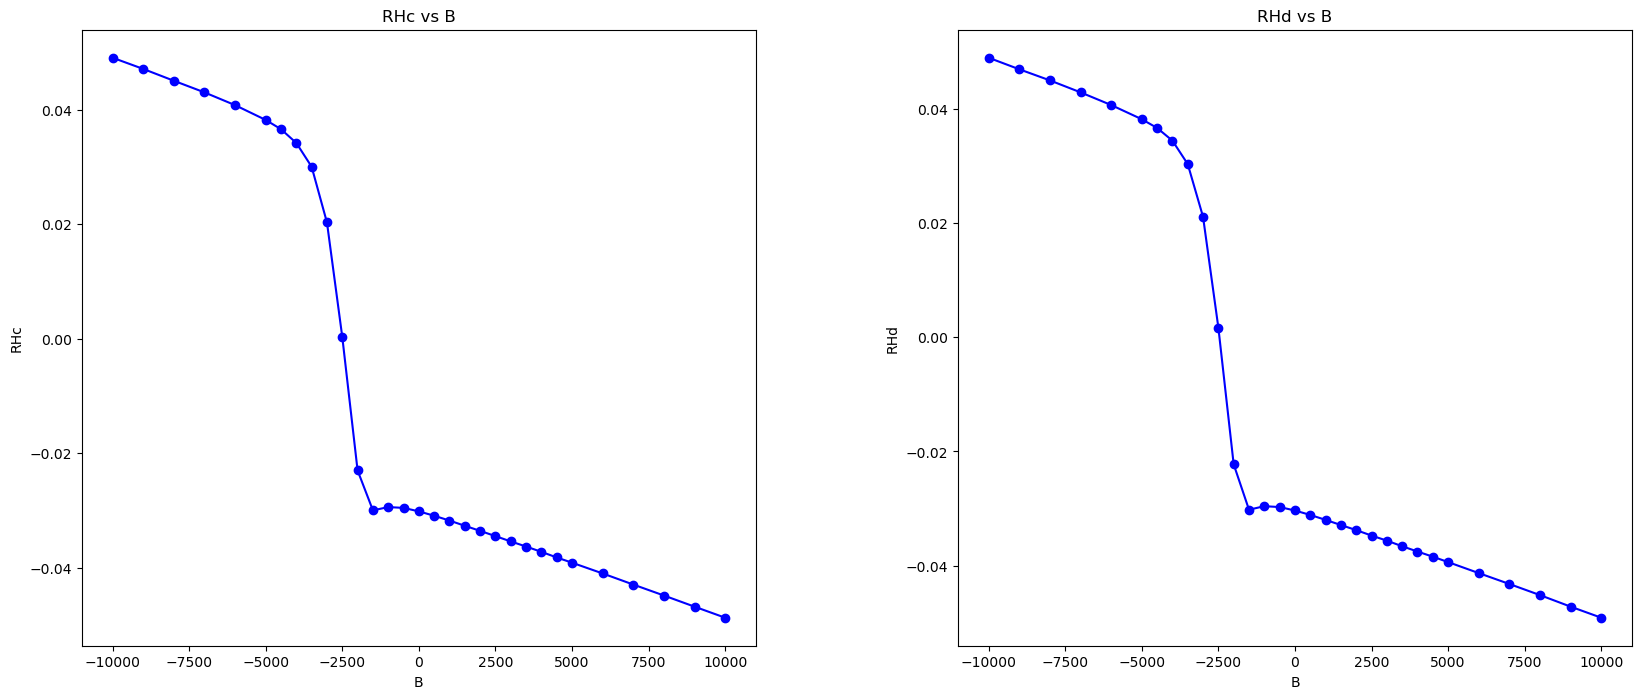

In [167]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

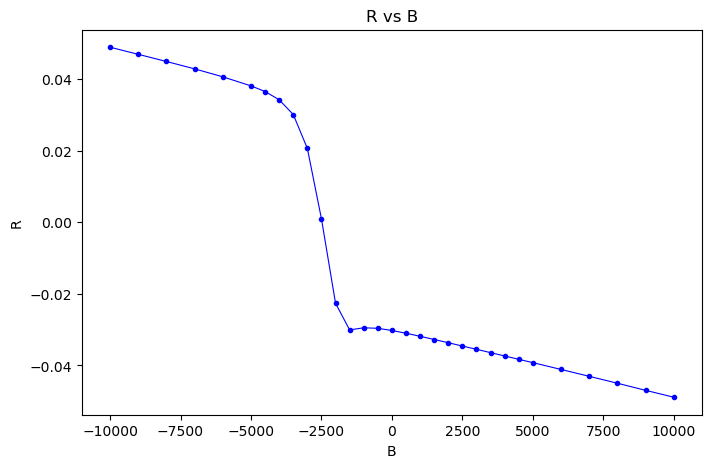

In [168]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [169]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,116.000462,-555.709518,555.719117,531.263739,-531.301472,-531.368246,531.375688,555.807617,-555.845268,1000000
1,0.001,-9000,116.000117,-556.550009,556.569606,533.081308,-533.122263,-533.176794,533.187086,556.660418,-556.695214,1000000
2,0.001,-8000,116.000612,-557.393905,557.417946,534.917583,-534.945095,-535.004375,534.997209,557.479336,-557.513607,1000000
3,0.001,-7000,116.000292,-558.255618,558.254826,536.734419,-536.769839,-536.808162,536.804401,558.330523,-558.359879,1000000
4,0.001,-6000,116.000229,-559.119743,559.123177,538.562515,-538.590641,-538.643408,538.640711,559.190933,-559.239772,1000000
5,0.001,-5000,116.000352,-560.015050,560.003848,540.391207,-540.437236,-540.470007,540.466797,560.066022,-560.115656,1000000
6,0.001,-4500,116.000339,-560.451063,560.457033,541.309152,-541.350419,-541.378610,541.363637,560.519699,-560.545897,1000000
7,0.001,-4000,116.000095,-560.885813,560.898165,542.225499,-542.259534,-542.296763,542.295128,560.974205,-561.017937,1000000
8,0.001,-3500,116.000330,-561.340136,561.363737,543.131423,-543.188639,-543.218767,543.224361,561.442231,-561.457272,1000000
9,0.001,-3000,115.999961,-561.814178,561.822432,544.075323,-544.114126,-544.122529,544.143083,561.882734,-561.908605,1000000


### Hall resistance calculation

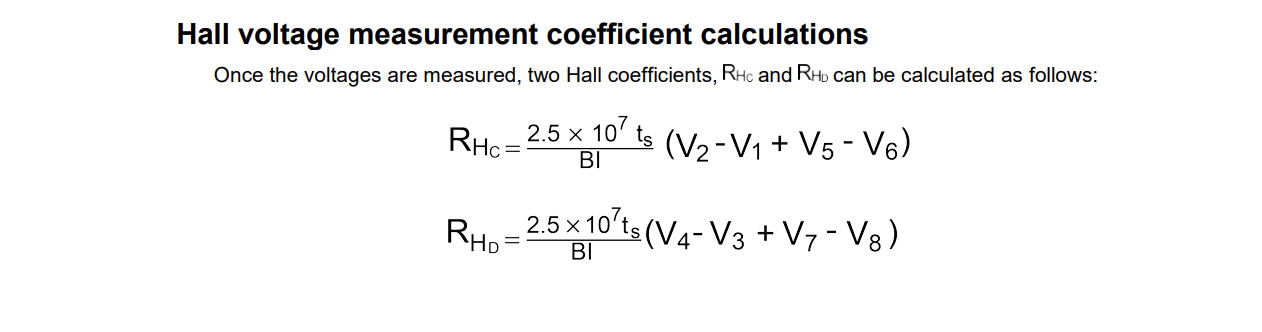

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [170]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

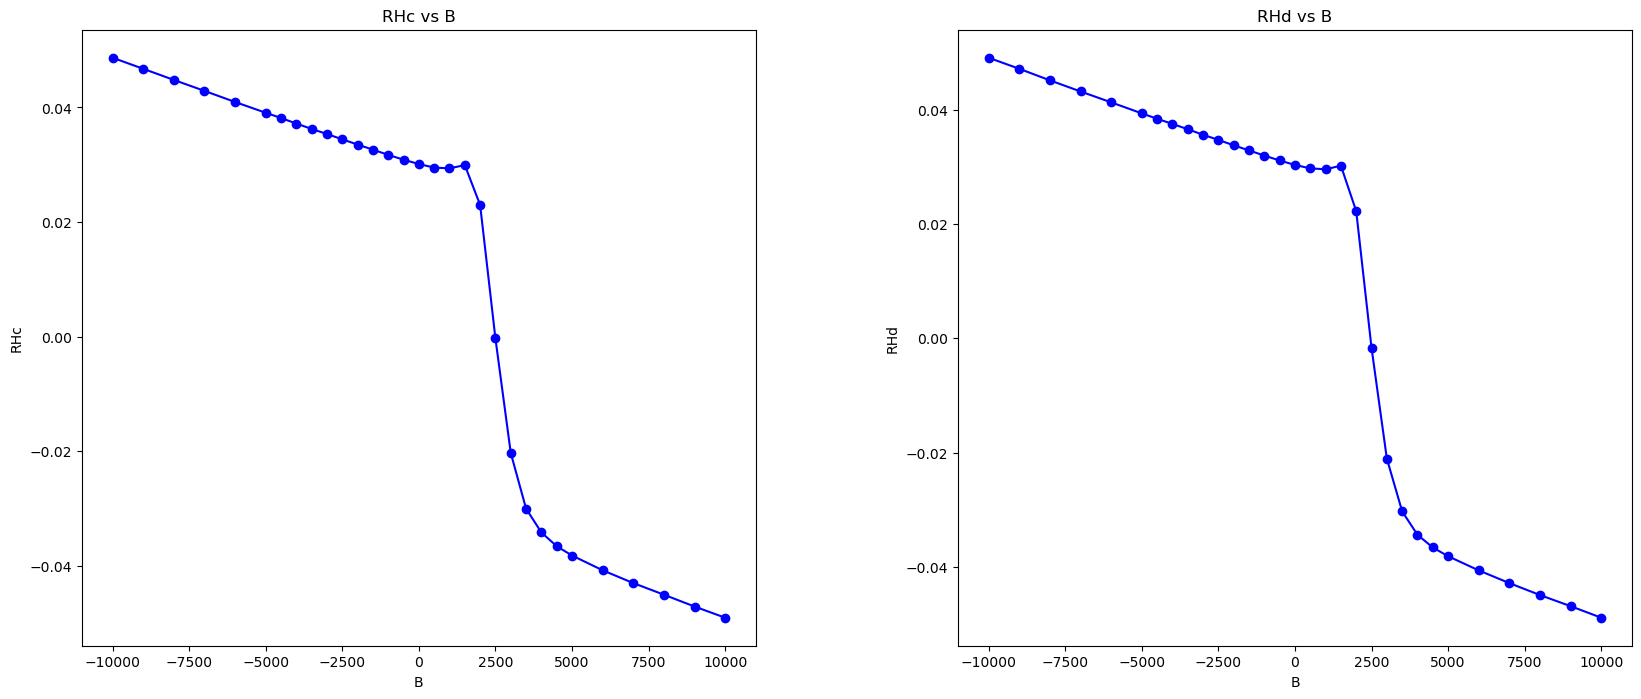

In [171]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

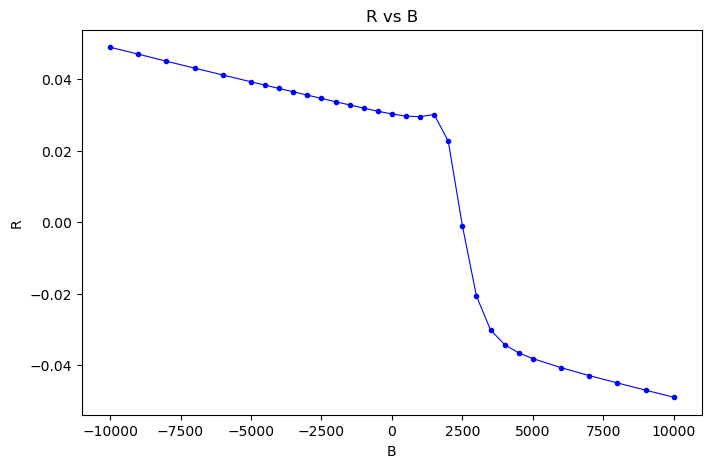

In [172]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

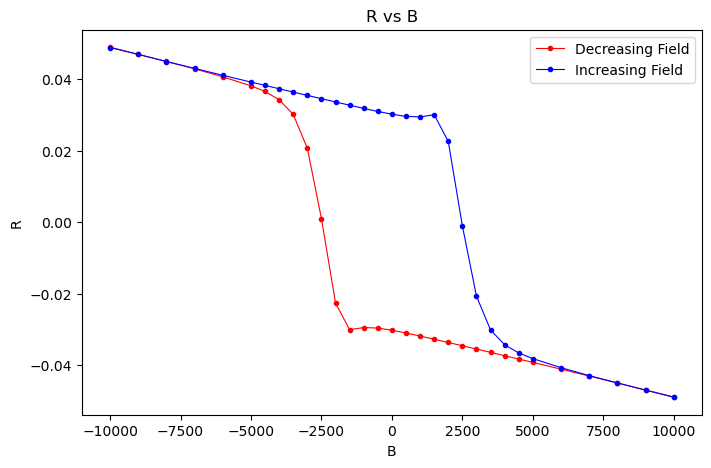

In [173]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()